# Parameters compiled and compared from global fit results

I put together all the parameters from the fit results table here. The "labels" list tells what each entry is. Right now the liquid xenon lists have more entries, with pressure, absorption, and diffuse reflectance at 30 degrees added. I plan to add the diffuse reflectance at 30 degrees for vacuum as well. I assembled the LXe and vacuum results into separate lists, but I ended up just putting them together in the end, and sorting by date. I've commented out the entries from August vacuum data.

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('default')
import numpy as np

labels = ['Sample','Albedo','Index','Gamma','K','chi^2','Date','$\\sigma_{n}$','Medium','Absolute Pressure (bar)','Absorption','Diffuse reflectance at $30^{\circ}$','Albedo error','Index error','Gamma error','K error','$\\sigma_{n}$ error']
vacdata = []
#vacdata.append(['LZ skived',0.801,1.93,0.108,9.73,9.92,'08/29/18',0.001,'vac',-1,-1,-1,None,None,None,None,None])
vacdata.append(['LZ skived',0.999,1.56,0.132,8.053,11.79,'11/09/18',0.001,'vac',-1,-1,0.827,None,None,None,None,None])
vacdata.append(['LZ skived',0.688,1.73,0.121,7.813,2.69,'01/10/19',0.001,'vac',-1,-1,0.543,None,None,None,None,None])
#vacdata.append(['M18 polished',0.986,1.59,0.143,3.706,6.21,'08/30/18',0.001,'vac',-1,-1,-1,None,None,None,None,None])
vacdata.append(['M18 polished',0.834,1.7,0.092,3.178,3.07,'10/01/18',0.001,'vac',-1,-1,0.671,None,None,None,None,None])
vacdata.append(['M18 polished',0.909,1.53,0.077,3.422,3.78,'02/20/19',0.001,'vac',-1,-1,0.773,None,None,None,None,None])
vacdata.append(['M18 turn',0.88,1.6,0.166,14.012,2.57,'02/20/19',0.001,'vac',-1,-1,0.712,None,None,None,None,None])
vacdata.append(['M18 turn',0.742,1.31,0.128,-1,5.48,'11/09/18',0.001,'vac',-1,-1,0.662,None,None,None,None,None])
#vacdata.append(['M18 turn',0.987,1.62,0.164,-1,11.19,'08/30/18',0.001,'vac',-1,-1,-1,None,None,None,None,None])
#vacdata.append(['NXT85',0.844,1.69,0.13,-1,10.6,'08/30/18',0.001,'vac',-1,-1,-1,None,None,None,None,None])
vacdata.append(['NXT85',0.89,1.57,0.111,-1,1.56,'11/26/18',0.001,'vac',-1,-1,0.741,None,None,None,None,None])
#vacdata.append(['LUX',0.672,1.67,0.145,-1,8.17,'08/29/18',0.001,'vac',-1,-1,-1,None,None,None,None,None])
vacdata.append(['LUX',0.645,1.39,0.122,12.512,3.16,'11/09/18',0.001,'vac',-1,-1,0.573,None,None,None,None,None])
#vacdata.append(['M17 turn',1.178,1.8,0.16,-1,7.8,'08/30/18',0.001,'vac',-1,-1,-1,None,None,None,None,None])
vacdata.append(['M17 turn',0.921,1.6,0.15,-1,4.89,'09/21/18',0.001,'vac',-1,-1,0.75,None,None,None,None,None])
vacdata.append(['M17 turn',1.173,1.56,0.154,11.116,3.32,'01/10/19',0.001,'vac',-1,-1,0.963,None,None,None,None,None])
#vacdata.append(['807NX',0.692,1.92,0.159,-1,12.12,'08/29/18',0.001,'vac',-1,-1,-1,None,None,None,None,None])
vacdata.append(['807NX',0.894,1.64,0.146,-1,4.12,'02/20/19',0.001,'vac',-1,-1,0.72,None,None,None,None,None])

# Systematics (in order):
# Bkg sub uncertainty (range of plausible scaling)
# Incident angle uncertainty (nominal vs best fit; scale by chi^2 diff?)
# Gaussian n range vs single n: include error? or is n_PTFE only interpretable in context of a particular model?
# Power uncertainty (2% on rho only)
# Mirror correction? (Run 1 only; may want to recalculate errors using no-correction case as best fit)

lxedata = []
pwr_err=0.02 # Make larger to include not just fluctuations over time but also uncertainty from power correction factor
#1st run no bubbles
lxedata.append(['LZ skived',0.828,1.562,0.12,-1,2.73,'11/02/18',1.09/20,'lxe',1.82,3.5,0.693,None,None,None,None,None])
#2nd run no bubbles before getter
lxedata.append(['LZ skived',0.83,1.576,0.122,-1,1.83,'11/30/18',1.34/20,'lxe',1.39,1.1,0.706,None,None,None,None,None])
#2nd run no bubbles after getter
lxedata.append(['LZ skived',0.832,1.581,0.118,-1,1.98,'12/03/18',1.38/20,'lxe',1.39,1.65,0.713,None,None,None,None,None])
#2nd run with bubbles
lxedata.append(['LZ skived',0.796,1.568,0.122,-1,1.6,'11/30/18',1.2/20,'lxe',2,1.1,0.675,None,None,None,None,None])
#2nd run 1/8" above center
lxedata.append(['LZ skived',0.848,1.582,0.118,-1,1.89,'12/07/18',1.36/20,'lxe',1.21,1.8,0.727,None,None,None,None,None])
#2nd run high pressure #1
rho_err=np.sqrt(np.sum(np.array([0.015,0,0.003,pwr_err*0.795])**2))
n_err=np.sqrt(np.sum(np.array([0.001,0,0.011])**2))
gamma_err=np.sqrt(np.sum(np.array([0.002,0,0.019])**2))
n_range_err=np.sqrt(np.sum(np.array([0,0.001])**2))
lxedata.append(['LZ skived',0.795,1.6,0.11,-1,1.6,'12/05/18',1.22/20,'lxe',2.49,1.7,0.699,rho_err,n_err,gamma_err,None,n_range_err])
#2nd run high pressure #2
lxedata.append(['LZ skived',0.823,1.597,0.119,-1,1.62,'12/07/18',1.4/20,'lxe',2.45,1.8,0.718,None,None,None,None,None])
#2nd run medium pressure #1
lxedata.append(['LZ skived',0.809,1.601,0.11,-1,2.04,'12/05/18',1.49/20,'lxe',1.95,1.7,0.710,None,None,None,None,None])
#2nd run medium pressure #2
lxedata.append(['LZ skived',0.831,1.596,0.113,-1,1.75,'12/07/18',1.39/20,'lxe',1.9,1.8,0.726,None,None,None,None,None])
#2nd run low pressure #1
rho_err=np.sqrt(np.sum(np.array([0.016,0.0207,0.011,pwr_err*0.828])**2))
n_err=np.sqrt(np.sum(np.array([0,0.009,0.015])**2))
gamma_err=np.sqrt(np.sum(np.array([0,0.006,0.013])**2))
n_range_err=np.sqrt(np.sum(np.array([0.01,0.089])**2))
lxedata.append(['LZ skived',0.762,1.582,0.11,-1,1.25,'12/05/18',1.25/20,'lxe',1.21,1.7,0.655,rho_err,n_err,gamma_err,None,n_range_err])
#2nd run low pressure #2
lxedata.append(['LZ skived',0.856,1.582,0.117,-1,1.85,'12/07/18',1.38/20,'lxe',1.21,1.8,0.735,None,None,None,None,None])
#3rd run 0.19barg
rho_err=np.sqrt(np.sum(np.array([0.052,0.019,0.009,pwr_err*0.742])**2))
n_err=np.sqrt(np.sum(np.array([0,0.007,0.008])**2))
gamma_err=np.sqrt(np.sum(np.array([0,0.005,0.005])**2))
n_range_err=np.sqrt(np.sum(np.array([0.05,0.099])**2))
lxedata.append(['LZ skived',0.742,1.568,0.12,-1,2.3,'12/20/18',1.34/20,'lxe',1.19,2.6,0.625,rho_err,n_err,gamma_err,None,n_range_err])
#3rd run 1.45barg
rho_err=np.sqrt(np.sum(np.array([0.083,0.040,0.022,pwr_err*0.748])**2))
n_err=np.sqrt(np.sum(np.array([0,0.021,0.012])**2))
gamma_err=np.sqrt(np.sum(np.array([0,0.007,0.022])**2))
n_range_err=np.sqrt(np.sum(np.array([0.02,0.186])**2))
lxedata.append(['LZ skived',0.748,1.596,0.12,-1,2.2,'12/20/18',1.71/20,'lxe',2.45,2.6,0.649,rho_err,n_err,gamma_err,None,n_range_err])
#1st run no bubbles
rho_err=np.sqrt(np.sum(np.array([0.01,0.018,0.024,pwr_err*0.628])**2))
n_err=np.sqrt(np.sum(np.array([0,0.008,0.013])**2))
gamma_err=np.sqrt(np.sum(np.array([0,0.014,0.022])**2))
n_range_err=np.sqrt(np.sum(np.array([0.03,0.22])**2))
lxedata.append(['LUX',0.628,1.578,0.149,-1,2.82,'11/02/18',1.51/20,'lxe',1.75,3.5,0.532,rho_err,n_err,gamma_err,None,n_range_err])
#1st run no bubbles
rho_err=np.sqrt(np.sum(np.array([0.016,0.012,0.013,pwr_err*0.766])**2))
n_err=np.sqrt(np.sum(np.array([0.009,0.016,0.021])**2))
gamma_err=np.sqrt(np.sum(np.array([0.003,0.021,0.024])**2))
n_range_err=np.sqrt(np.sum(np.array([0.2,0.208])**2))
lxedata.append(['M18 turn',0.766,1.572,0.166,-1,3.16,'11/02/18',1.44/20,'lxe',1.75,3.5,0.641,rho_err,n_err,gamma_err,None,n_range_err])
#2nd run with bubbles
rho_err=np.sqrt(np.sum(np.array([0.014,0.002,0.023,pwr_err*0.768])**2))
n_err=np.sqrt(np.sum(np.array([0.001,0.004,0.008])**2))
gamma_err=np.sqrt(np.sum(np.array([0,0.002,0.012])**2))
n_range_err=np.sqrt(np.sum(np.array([0.01,0.06])**2))
lxedata.append(['NXT85',0.768,1.575,0.113,-1,1.8,'12/05/18',1.55/20,'lxe',2,1.7,0.653,rho_err,n_err,gamma_err,None,n_range_err])
#2nd run no bubbles
rho_err=np.sqrt(np.sum(np.array([0.013,0.013,0.023,pwr_err*0.914])**2))
n_err=np.sqrt(np.sum(np.array([0,0.013,0.013])**2))
gamma_err=np.sqrt(np.sum(np.array([0.001,0.004,0.004])**2))
n_range_err=np.sqrt(np.sum(np.array([0.01,0.14])**2))
K_err=np.sqrt(np.sum(np.array([0.01,0.318,1.34])**2))
lxedata.append(['M18 polished',0.914,1.579,0.081,4.86,3.45,'12/05/18',1.26/20,'lxe',1.39,1.7,0.788,rho_err,n_err,gamma_err,K_err,n_range_err])
#3rd run 0.19barg
rho_err=np.sqrt(np.sum(np.array([0.036,0.032,0.010,pwr_err*0.744])**2))
n_err=np.sqrt(np.sum(np.array([0.002,0.019,0.021])**2))
gamma_err=np.sqrt(np.sum(np.array([0.003,0.011,0.031])**2))
n_range_err=np.sqrt(np.sum(np.array([0.06,0.44])**2))
lxedata.append(['807NX',0.744,1.572,0.184,-1,1.59,'12/20/18',1.89/20,'lxe',1.19,2.6,0.616,rho_err,n_err,gamma_err,None,n_range_err])
#3rd run 1.45barg
rho_err=np.sqrt(np.sum(np.array([0.081,0.008,0.021,pwr_err*0.733])**2))
n_err=np.sqrt(np.sum(np.array([0,0.028,0.029])**2))
gamma_err=np.sqrt(np.sum(np.array([0.001,0.016,0.045])**2))
n_range_err=np.sqrt(np.sum(np.array([0.05,0.547])**2))
lxedata.append(['807NX',0.733,1.596,0.192,-1,1.52,'12/20/18',2.02/20,'lxe',2.45,2.6,0.619,rho_err,n_err,gamma_err,None,n_range_err])
#3rd run 0.2barg
rho_err=np.sqrt(np.sum(np.array([0.077,0.019,0.009,pwr_err*0.717])**2))
n_err=np.sqrt(np.sum(np.array([0,0.008,0.013])**2))
gamma_err=np.sqrt(np.sum(np.array([0.001,0.006,0.026])**2))
n_range_err=np.sqrt(np.sum(np.array([0.06,0.607])**2))
lxedata.append(['M17 turn',0.717,1.545,0.209,-1,1.83,'12/19/18',1.62/20,'lxe',1.2,2.6,0.572,rho_err,n_err,gamma_err,None,n_range_err])
#3rd run 1.45barg
rho_err=np.sqrt(np.sum(np.array([0.087,0.006,0.016,pwr_err*0.793])**2))
n_err=np.sqrt(np.sum(np.array([0.006,0.010,0.019])**2))
gamma_err=np.sqrt(np.sum(np.array([0.004,0.004,0.032])**2))
n_range_err=np.sqrt(np.sum(np.array([0.13,0.469])**2))
lxedata.append(['M17 turn',0.793,1.577,0.196,-1,1.53,'12/20/18',1.7/20,'lxe',2.45,2.6,0.659,rho_err,n_err,gamma_err,None,n_range_err])
#3rd run 1/8" above center
lxedata.append(['M17 turn',0.771,1.545,0.203,-1,2.29,'12/20/18',1.54/20,'lxe',1.19,2.6,0.617,None,None,None,None,None])


data = vacdata+lxedata

for entry in data:
    year = int(entry[6][6:8])
    month = int(entry[6][0:2])
    day = int(entry[6][3:5])
    entry.append(year*365+month*30.4+day)
    
#data.sort(key = lambda entry: entry[0])

### Comparing fit parameters across samples over time

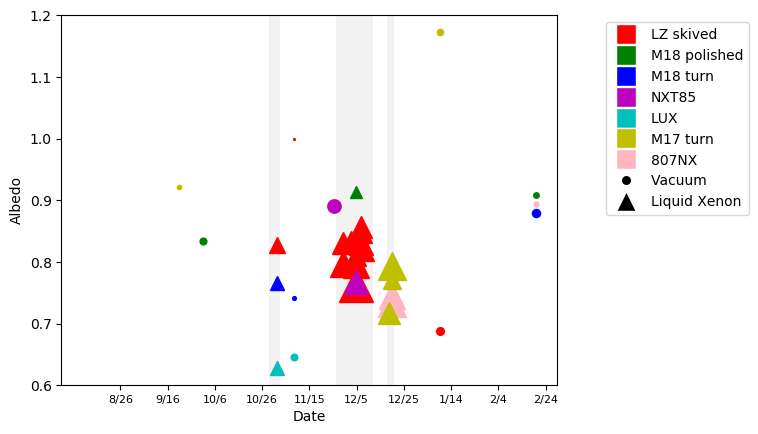

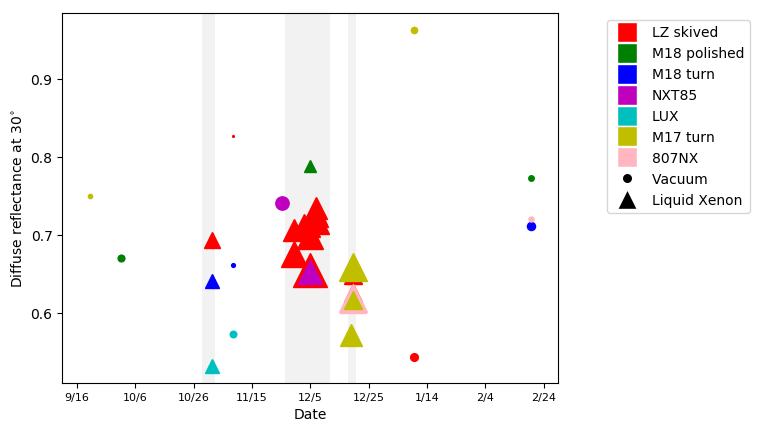

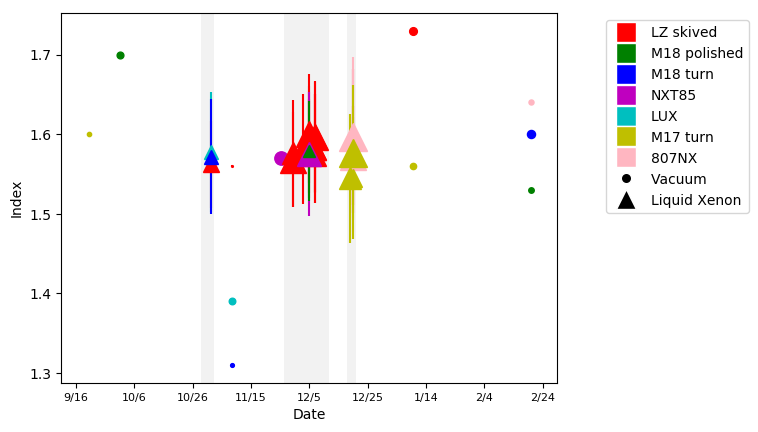

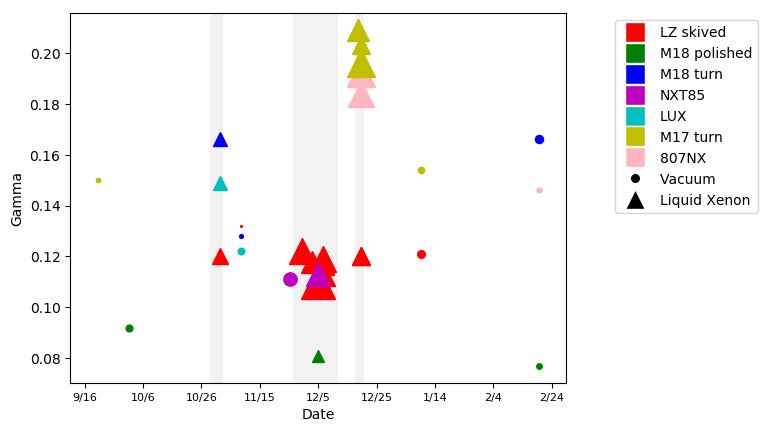

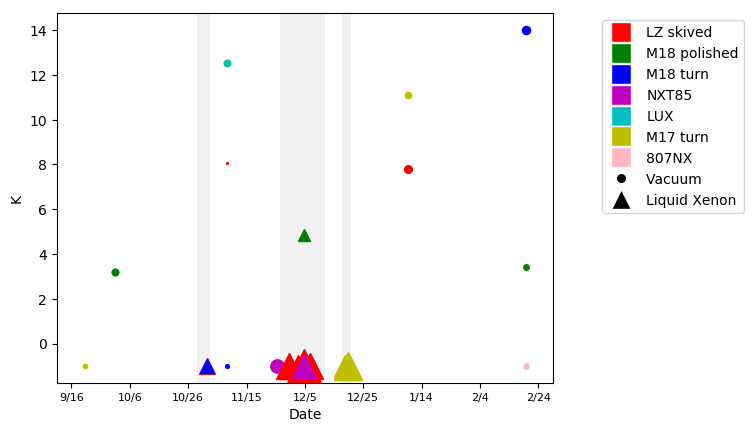

In [3]:
from matplotlib.lines import Line2D

sample_names = ['LZ skived','M18 polished','M18 turn','NXT85','LUX','M17 turn','807NX']
colorlist= ['r','g','b','m','c','y','lightpink']
def colors(name):
    for i in range(7):
        if name == sample_names[i]:
            number = i
    return colorlist[number]

def markers(medium):
    if medium == 'vac':
        return '.'
    if medium == 'lxe':
        return '^'
        
legend_elements = [Line2D([0], [0], marker='s', color='w', label='LZ skived',markerfacecolor='r', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='M18 polished',markerfacecolor='g', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='M18 turn',markerfacecolor='b', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='NXT85',markerfacecolor='m', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='LUX',markerfacecolor='c', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='M17 turn',markerfacecolor='y', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='807NX',markerfacecolor='lightpink', markersize=15),
                   Line2D([0], [0], marker='.', color='w', label='Vacuum',markerfacecolor='k', markersize=15),
                   Line2D([0], [0], marker='^', color='w', label='Liquid Xenon',markerfacecolor='k', markersize=15)]
    
plt.figure()
for entry in data:
    plt.errorbar(entry[-1],entry[1],marker = markers(entry[8]),markersize = 30/entry[5], color = colors(entry[0]))
    plt.ylabel(labels[1])
    plt.xlabel('Date')
locs = plt.xticks()[0]
day = np.floor(locs%365%30.4)
month = np.floor(locs%365./30.4)
month_day=[]
for i in range(len(locs)):
    if month[i]==0:
        month[i] = 12
    month_day.append(str(int(month[i]))+'/'+str(int(day[i])))
plt.xticks(locs,month_day)
plt.xticks(fontsize=8)
plt.xlim(6815,7025)
plt.axvspan(18*365+10*30.4+29,18*365+11*30.4+3,alpha = 0.1,facecolor='grey')
plt.axvspan(18*365+11*30.4+27,18*365+12*30.4+12,alpha = 0.1,facecolor='grey')
plt.axvspan(18*365+12*30.4+18,18*365+12*30.4+21,alpha = 0.1,facecolor='grey')
plt.legend(handles = legend_elements,bbox_to_anchor = [1.4,1])
#plt.savefig('albedocomparisons.png')

plt.figure()
for entry in data:
    plt.errorbar(entry[-1],entry[11],marker = markers(entry[8]),markersize = 30/entry[5], color = colors(entry[0]))
    plt.ylabel(labels[11])
    plt.xlabel('Date')
locs = plt.xticks()[0]
day = np.floor(locs%365%30.4)
month = np.floor(locs%365./30.4)
month_day=[]
for i in range(len(locs)):
    if month[i]==0:
        month[i] = 12
    month_day.append(str(int(month[i]))+'/'+str(int(day[i])))
plt.xticks(locs,month_day)
plt.xticks(fontsize=8)
plt.xlim(6855,7025)
plt.axvspan(18*365+10*30.4+29,18*365+11*30.4+3,alpha = 0.1,facecolor='grey')
plt.axvspan(18*365+11*30.4+27,18*365+12*30.4+12,alpha = 0.1,facecolor='grey')
plt.axvspan(18*365+12*30.4+18,18*365+12*30.4+21,alpha = 0.1,facecolor='grey')
plt.legend(handles = legend_elements,bbox_to_anchor = [1.4,1])
#plt.savefig('diffuse30comparisons.png')
  
plt.figure()
for entry in data:
    plt.errorbar([entry[-1]],[entry[2]],[entry[7]],marker = markers(entry[8]),markersize = 30/entry[5], color = colors(entry[0]))
    plt.ylabel(labels[2])
    plt.xlabel('Date')
locs = plt.xticks()[0]
day = np.floor(locs%365%30.4)
month = np.floor(locs%365./30.4)
month_day=[]
for i in range(len(locs)):
    if month[i]==0:
        month[i] = 12
    month_day.append(str(int(month[i]))+'/'+str(int(day[i])))
plt.xticks(locs,month_day)
plt.xticks(fontsize=8)
plt.xlim(6855,7025)
plt.axvspan(18*365+10*30.4+29,18*365+11*30.4+3,alpha = 0.1,facecolor='grey')
plt.axvspan(18*365+11*30.4+27,18*365+12*30.4+12,alpha = 0.1,facecolor='grey')
plt.axvspan(18*365+12*30.4+18,18*365+12*30.4+21,alpha = 0.1,facecolor='grey')
plt.legend(handles = legend_elements,bbox_to_anchor = [1.4,1])
#plt.savefig('indexcomparisons.png')

plt.figure()
for entry in data:
    plt.errorbar(entry[-1],entry[3],marker = markers(entry[8]),markersize = 30/entry[5], color = colors(entry[0]))
    plt.ylabel(labels[3])
    plt.xlabel('Date')
locs = plt.xticks()[0]
day = np.floor(locs%365%30.4)
month = np.floor(locs%365./30.4)
month_day=[]
for i in range(len(locs)):
    if month[i]==0:
        month[i] = 12
    month_day.append(str(int(month[i]))+'/'+str(int(day[i])))
plt.xticks(locs,month_day)
plt.xticks(fontsize=8)
plt.xlim(6855,7025)
plt.axvspan(18*365+10*30.4+29,18*365+11*30.4+3,alpha = 0.1,facecolor='grey')
plt.axvspan(18*365+11*30.4+27,18*365+12*30.4+12,alpha = 0.1,facecolor='grey')
plt.axvspan(18*365+12*30.4+18,18*365+12*30.4+21,alpha = 0.1,facecolor='grey')
plt.legend(handles = legend_elements,bbox_to_anchor = [1.4,1])
#plt.savefig('gammacomparisons.png')

plt.figure()
for entry in data:
    plt.errorbar(entry[-1],entry[4],marker = markers(entry[8]),markersize = 30/entry[5], color = colors(entry[0]))
    plt.ylabel(labels[4])
    plt.xlabel('Date')
locs = plt.xticks()[0]
day = np.floor(locs%365%30.4)
month = np.floor(locs%365./30.4)
month_day=[]
for i in range(len(locs)):
    if month[i]==0:
        month[i] = 12
    month_day.append(str(int(month[i]))+'/'+str(int(day[i])))
plt.xticks(locs,month_day)
plt.xticks(fontsize=8)
plt.xlim(6855,7025)
plt.axvspan(18*365+10*30.4+29,18*365+11*30.4+3,alpha = 0.1,facecolor='grey')
plt.axvspan(18*365+11*30.4+27,18*365+12*30.4+12,alpha = 0.1,facecolor='grey')
plt.axvspan(18*365+12*30.4+18,18*365+12*30.4+21,alpha = 0.1,facecolor='grey')
plt.legend(handles = legend_elements,bbox_to_anchor = [1.4,1])
#plt.savefig('Kcomparisons.png')

Notes from above plots: larger points correspond to smaller chi^2; with Gaussian smearing of F now the chi^2 values in LXe are typically smaller than in vacuum (the constant error used in LXe is 100 compared to 20 in vacuum). In the last plot, K is the parameter associated with the specular spike. A value K=-1 implies the specular spike was not used. None of the plots show a clear trend over time.

In the albedo plot, it looks like albedo we see in LXe is often lower than in vacuum (LUX, M17 turn, M18 turn, NXT85, 807NX) and sometimes the reverse (LZ skived, M18 polished). I will look at the correlation between vacuum parameters and LXe parameters below. The spread in albedos looks similar in LXe and vacuum, except that in vacuum we have an outlier with very high albedo (M17 turn).

In the index plot, clearly the index is more tightly constrained in LXe than in vacuum, and even across samples does not vary much. The LZ skived index maybe raises slightly over time.

The gamma plot shows the clearest separation between samples in LXe. We are now using Trowbridge-Reitz in both the LXe and vacuum cases. Again, the comparison between vacuum and LXe will be made below.

### Looking at correlation between fit parameters

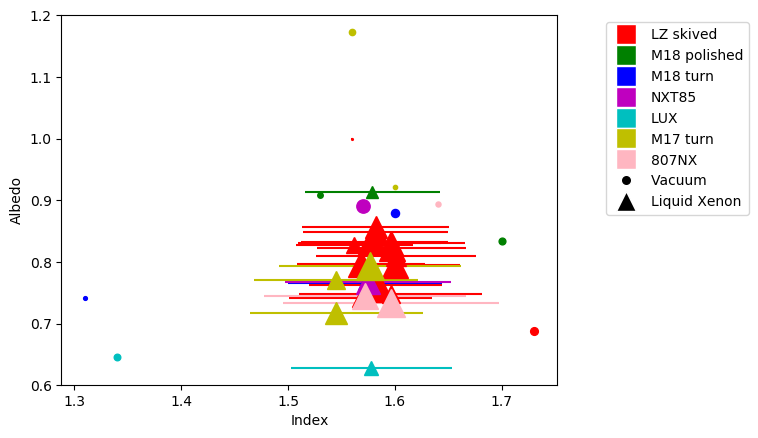

In [4]:
#plot albedo vs. index
for entry in data:
    plt.errorbar([entry[2]],[entry[1]],xerr = [entry[7]],marker = markers(entry[8]),markersize = 30/entry[5], color = colors(entry[0]))
    plt.ylabel(labels[1])
    plt.xlabel(labels[2])
plt.legend(handles = legend_elements,bbox_to_anchor = [1.4,1])


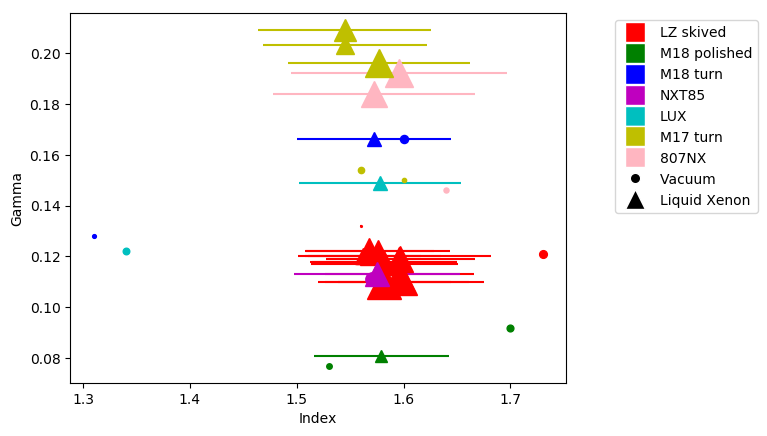

In [5]:
#plot gamma vs. index
for entry in data:
    plt.errorbar([entry[2]],[entry[3]],xerr = [entry[7]],marker = markers(entry[8]),markersize = 30/entry[5], color = colors(entry[0]))
    plt.ylabel(labels[3])
    plt.xlabel(labels[2])
plt.legend(handles = legend_elements,bbox_to_anchor = [1.4,1])

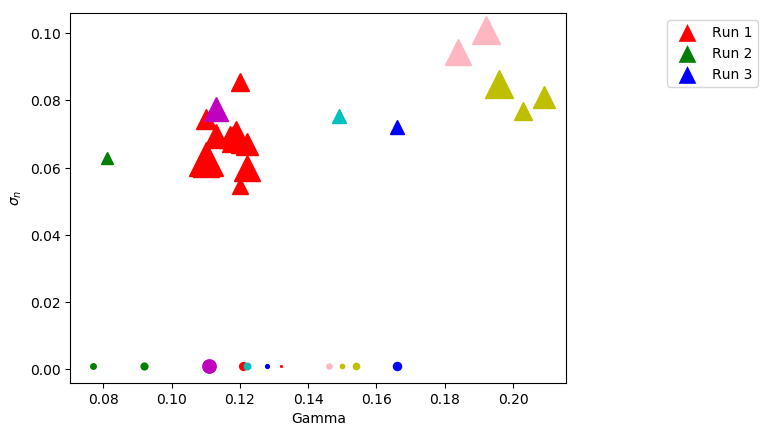

In [20]:
#plot index range vs. gamma
for entry in data:
    plt.errorbar([entry[3]],[entry[7]],marker = markers(entry[8]),markersize = 30/entry[5], color = colors(entry[0]))
    plt.ylabel(labels[7])
    plt.xlabel(labels[3])
plt.legend(handles = legend_elements,bbox_to_anchor = [1.4,1])

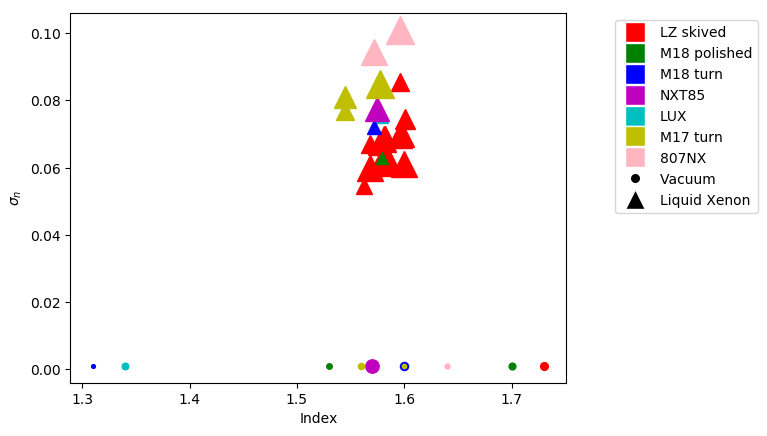

In [22]:
#plot index range vs. index
for entry in data:
    plt.errorbar([entry[2]],[entry[7]],marker = markers(entry[8]),markersize = 30/entry[5], color = colors(entry[0]))
    plt.ylabel(labels[7])
    plt.xlabel(labels[2])
plt.legend(handles = legend_elements,bbox_to_anchor = [1.4,1])

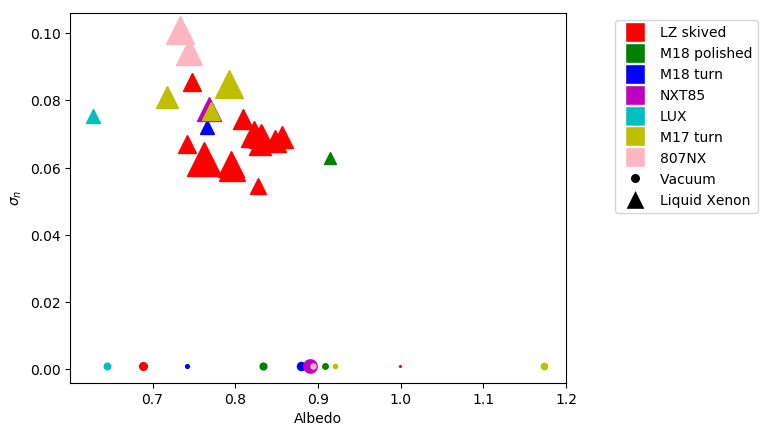

In [23]:
#plot index range vs. albedo
for entry in data:
    plt.errorbar([entry[1]],[entry[7]],marker = markers(entry[8]),markersize = 30/entry[5], color = colors(entry[0]))
    plt.ylabel(labels[7])
    plt.xlabel(labels[1])
plt.legend(handles = legend_elements,bbox_to_anchor = [1.4,1])

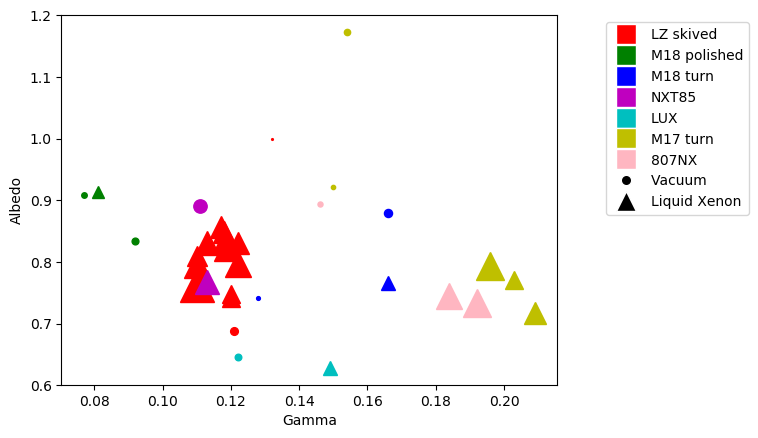

In [6]:
#plot albedo vs. gamma
for entry in data:
    plt.errorbar(entry[3],entry[1],marker = markers(entry[8]),markersize = 30/entry[5], color = colors(entry[0]))
    plt.ylabel(labels[1])
    plt.xlabel(labels[3])
plt.legend(handles = legend_elements,bbox_to_anchor = [1.4,1])

In the plots above, there is no clear correlation across fits between any two of the 3 parameters albedo, index, and gamma. It's possible that the albedo vs. gamma plot shows a weak anti-correlation, which is interesting from the perspective of whether polishing somehow increases the albedo. The M18 polished sample does have the lowest gamma, and highest albedo in LXe (but not in vacuum). There also appears to be a positive correlation between gamma and the spread in index used in LXe fits, and possibly an anti-correlation between albedo and spread in index.

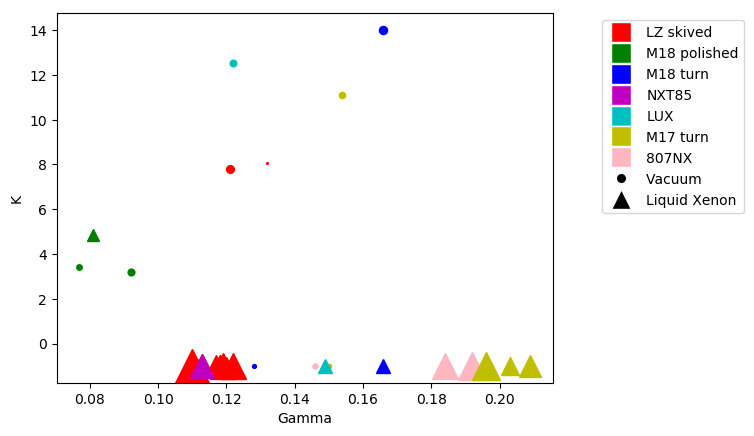

In [7]:
#plot K vs. gamma
for entry in data:
    plt.errorbar(entry[3],entry[4],marker = markers(entry[8]),markersize = 30/entry[5], color = colors(entry[0]))
    plt.ylabel(labels[4])
    plt.xlabel(labels[3])
plt.legend(handles = legend_elements,bbox_to_anchor = [1.4,1])

The plot above shows the correlation between gamma and the K parameter for the specular spike. It looks they might be positively correlated in vacuum (the only fit using a specular spike in LXe is M18 polished). This may be a useful plot for examining how important it is to include a specular spike component depending on how smooth the sample is, in terms of gamma.

### Looking at dependence of fit parameters on pressure and purity of LXe with LZ skived data

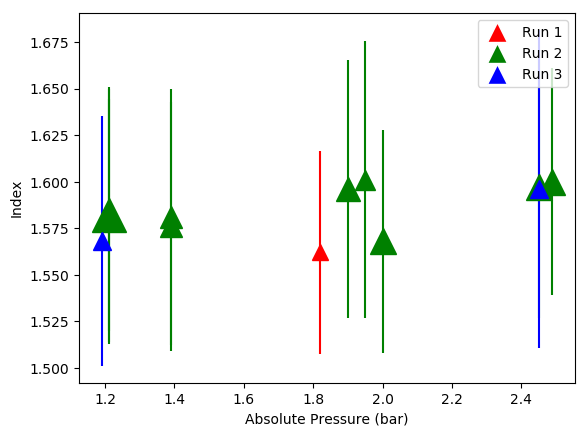

In [8]:
#plot index vs. pressure for LZ skived in LXe
def runcolors(time):
    if 18*365+10*30.4+29<=time<=18*365+11*30.4+3:
        return 'r'
    if 18*365+11*30.4+27<=time<=18*365+12*30.4+12:
        return 'g'
    if 18*365+12*30.4+18<=time<=18*365+12*30.4+21:
        return 'b'

for entry in data:
    if entry[0] == 'LZ skived' and entry[8] == 'lxe':
        plt.errorbar([entry[9]],[entry[2]],[entry[7]],marker = markers(entry[8]),markersize = 30/entry[5], color = runcolors(entry[-1]))
        plt.ylabel(labels[2])
        plt.xlabel(labels[9])

legend_elements = [Line2D([0], [0], marker='^', color='w', label='Run 1',markerfacecolor='r', markersize=15),
                  Line2D([0], [0], marker='^', color='w', label='Run 2',markerfacecolor='g', markersize=15),
                  Line2D([0], [0], marker='^', color='w', label='Run 3',markerfacecolor='b', markersize=15)]
plt.legend(handles = legend_elements)

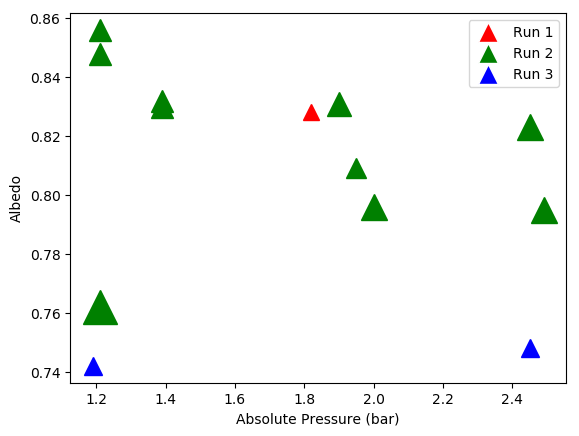

In [9]:
#plot albedo vs. pressure for LZ skived in LXe
for entry in data:
    if entry[0] == 'LZ skived' and entry[8] == 'lxe':
        plt.errorbar([entry[9]],[entry[1]],marker = markers(entry[8]),markersize = 30/entry[5], color = runcolors(entry[-1]))
        plt.ylabel(labels[1])
        plt.xlabel(labels[9])
        
legend_elements = [Line2D([0], [0], marker='^', color='w', label='Run 1',markerfacecolor='r', markersize=15),
                  Line2D([0], [0], marker='^', color='w', label='Run 2',markerfacecolor='g', markersize=15),
                  Line2D([0], [0], marker='^', color='w', label='Run 3',markerfacecolor='b', markersize=15)]
plt.legend(handles = legend_elements)

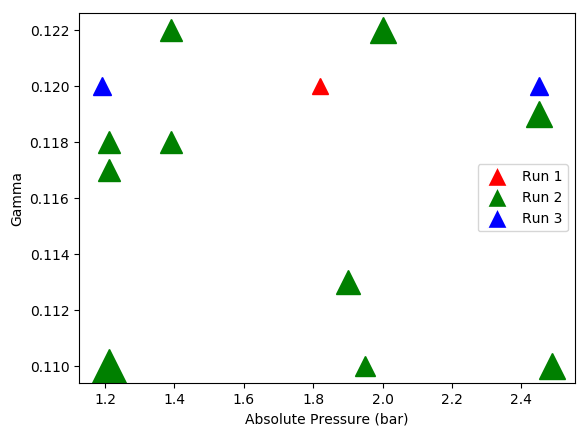

In [10]:
#plot gamma vs. pressure for LZ skived in LXe
for entry in data:
    if entry[0] == 'LZ skived' and entry[8] == 'lxe':
        plt.errorbar([entry[9]],[entry[3]],marker = markers(entry[8]),markersize = 30/entry[5], color = runcolors(entry[-1]))
        plt.ylabel(labels[3])
        plt.xlabel(labels[9])

legend_elements = [Line2D([0], [0], marker='^', color='w', label='Run 1',markerfacecolor='r', markersize=15),
                  Line2D([0], [0], marker='^', color='w', label='Run 2',markerfacecolor='g', markersize=15),
                  Line2D([0], [0], marker='^', color='w', label='Run 3',markerfacecolor='b', markersize=15)]
plt.legend(handles = legend_elements)

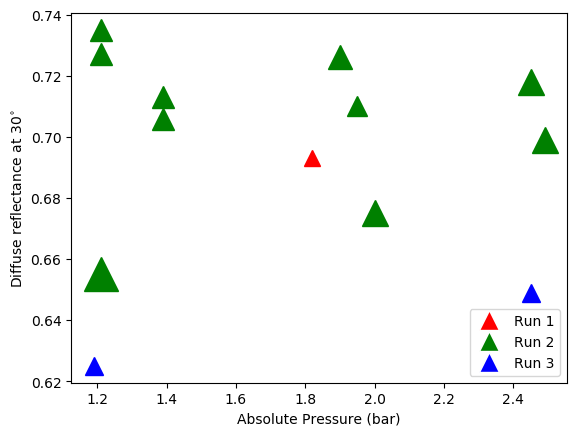

In [11]:
#plot diffuse reflectance at 30 degrees vs. pressure for LZ skived in LXe
for entry in data:
    if entry[0] == 'LZ skived' and entry[8] == 'lxe':
        plt.errorbar([entry[9]],[entry[11]],marker = markers(entry[8]),markersize = 30/entry[5], color = runcolors(entry[-1]))
        plt.ylabel(labels[11])
        plt.xlabel(labels[9])

legend_elements = [Line2D([0], [0], marker='^', color='w', label='Run 1',markerfacecolor='r', markersize=15),
                  Line2D([0], [0], marker='^', color='w', label='Run 2',markerfacecolor='g', markersize=15),
                  Line2D([0], [0], marker='^', color='w', label='Run 3',markerfacecolor='b', markersize=15)]
plt.legend(handles = legend_elements)

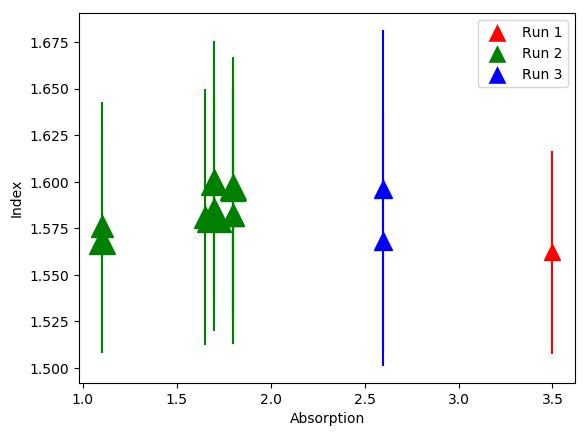

In [12]:
#plot index vs. absorption for LZ skived in LXe
for entry in data:
    if entry[0] == 'LZ skived' and entry[8] == 'lxe':
        plt.errorbar([entry[10]],[entry[2]],[entry[7]],marker = markers(entry[8]),markersize = 30/entry[5], color = runcolors(entry[-1]))
        plt.ylabel(labels[2])
        plt.xlabel(labels[10])

legend_elements = [Line2D([0], [0], marker='^', color='w', label='Run 1',markerfacecolor='r', markersize=15),
                  Line2D([0], [0], marker='^', color='w', label='Run 2',markerfacecolor='g', markersize=15),
                  Line2D([0], [0], marker='^', color='w', label='Run 3',markerfacecolor='b', markersize=15)]
plt.legend(handles = legend_elements)

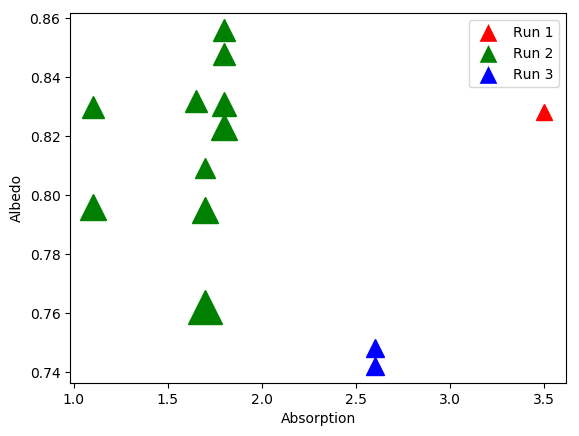

In [13]:
#plot albedo vs. absorption for LZ skived in LXe
for entry in data:
    if entry[0] == 'LZ skived' and entry[8] == 'lxe':
        plt.errorbar([entry[10]],[entry[1]],marker = markers(entry[8]),markersize = 30/entry[5], color = runcolors(entry[-1]))
        plt.ylabel(labels[1])
        plt.xlabel(labels[10])
        
legend_elements = [Line2D([0], [0], marker='^', color='w', label='Run 1',markerfacecolor='r', markersize=15),
                  Line2D([0], [0], marker='^', color='w', label='Run 2',markerfacecolor='g', markersize=15),
                  Line2D([0], [0], marker='^', color='w', label='Run 3',markerfacecolor='b', markersize=15)]
plt.legend(handles = legend_elements)

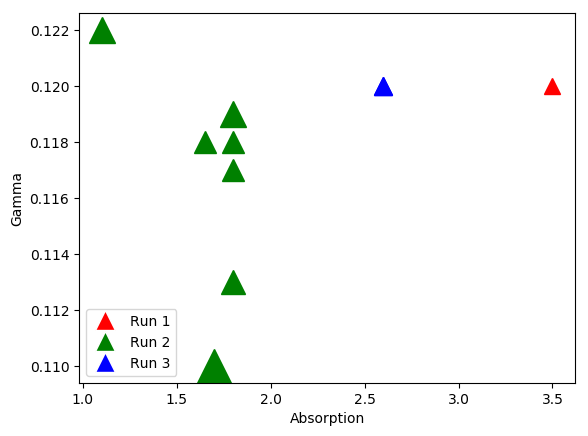

In [14]:
#plot gamma vs. absorption for LZ skived in LXe
for entry in data:
    if entry[0] == 'LZ skived' and entry[8] == 'lxe':
        plt.errorbar([entry[10]],[entry[3]],marker = markers(entry[8]),markersize = 30/entry[5], color = runcolors(entry[-1]))
        plt.ylabel(labels[3])
        plt.xlabel(labels[10])

legend_elements = [Line2D([0], [0], marker='^', color='w', label='Run 1',markerfacecolor='r', markersize=15),
                  Line2D([0], [0], marker='^', color='w', label='Run 2',markerfacecolor='g', markersize=15),
                  Line2D([0], [0], marker='^', color='w', label='Run 3',markerfacecolor='b', markersize=15)]
plt.legend(handles = legend_elements)

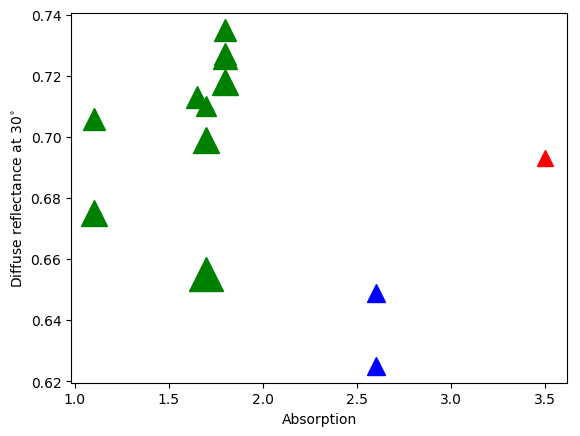

In [15]:
#plot diffuse reflectance at 30 degrees vs. absorption for LZ skived in LXe
for entry in data:
    if entry[0] == 'LZ skived' and entry[8] == 'lxe':
        plt.errorbar([entry[10]],[entry[11]],marker = markers(entry[8]),markersize = 30/entry[5], color = runcolors(entry[-1]))
        plt.ylabel(labels[11])
        plt.xlabel(labels[10])

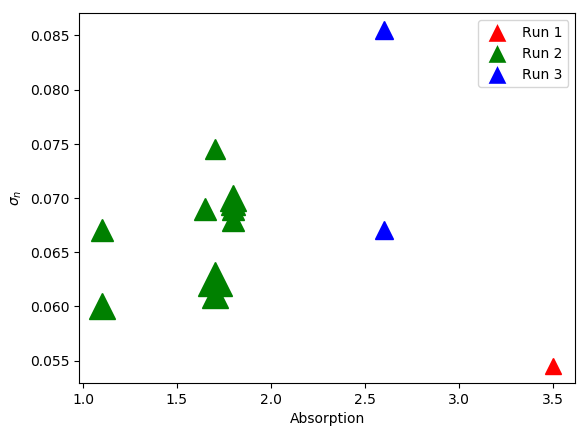

In [16]:
#plot index spread vs. absorption for LZ skived in LXe
for entry in data:
    if entry[0] == 'LZ skived' and entry[8] == 'lxe':
        plt.errorbar([entry[10]],[entry[7]],marker = markers(entry[8]),markersize = 30/entry[5], color = runcolors(entry[-1]))
        plt.ylabel(labels[7])
        plt.xlabel(labels[10])
        
legend_elements = [Line2D([0], [0], marker='^', color='w', label='Run 1',markerfacecolor='r', markersize=15),
                  Line2D([0], [0], marker='^', color='w', label='Run 2',markerfacecolor='g', markersize=15),
                  Line2D([0], [0], marker='^', color='w', label='Run 3',markerfacecolor='b', markersize=15)]
plt.legend(handles = legend_elements)

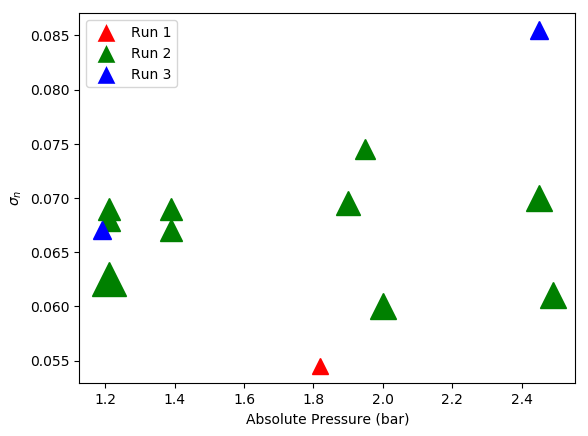

In [17]:
#plot index spread vs. pressure for LZ skived in LXe
for entry in data:
    if entry[0] == 'LZ skived' and entry[8] == 'lxe':
        plt.errorbar([entry[9]],[entry[7]],marker = markers(entry[8]),markersize = 30/entry[5], color = runcolors(entry[-1]))
        plt.ylabel(labels[7])
        plt.xlabel(labels[9])
        
legend_elements = [Line2D([0], [0], marker='^', color='w', label='Run 1',markerfacecolor='r', markersize=15),
                  Line2D([0], [0], marker='^', color='w', label='Run 2',markerfacecolor='g', markersize=15),
                  Line2D([0], [0], marker='^', color='w', label='Run 3',markerfacecolor='b', markersize=15)]
plt.legend(handles = legend_elements)

It doesn't look like any of the albedo, index, gamma, or spread in index are very correlated with the pressure or purity of LXe. We may see a small rise of the PTFE index with increasing pressure (reflecting what we expect is a small decrease in the LXe index), but that effect is much clearer in the data where we've fixed the incident angle to near the critical angle and changed pressure.

### Correlation of fit parameters between vacuum and LXe
The plots below take the unweighted average of the fit parameters for each sample and compare that average between vacuum and LXe. I've also plotted y=x to guide the eye (testing the hypothesis that the PTFE parameters are unchanged between vacuum and LXe).

Text(0, 0.5, 'Sample gamma in LXe')

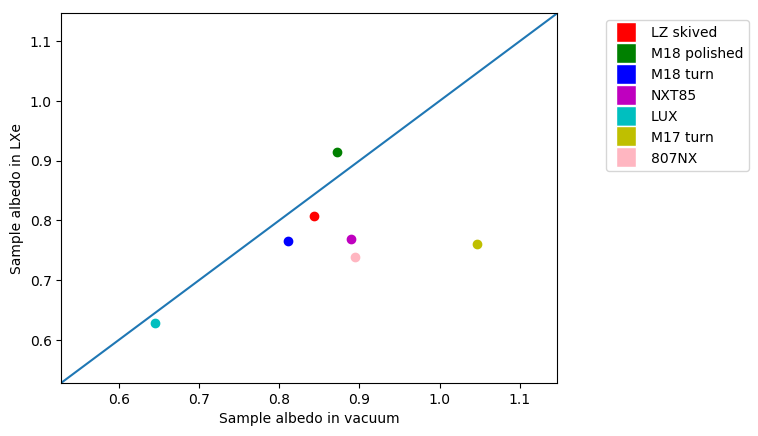

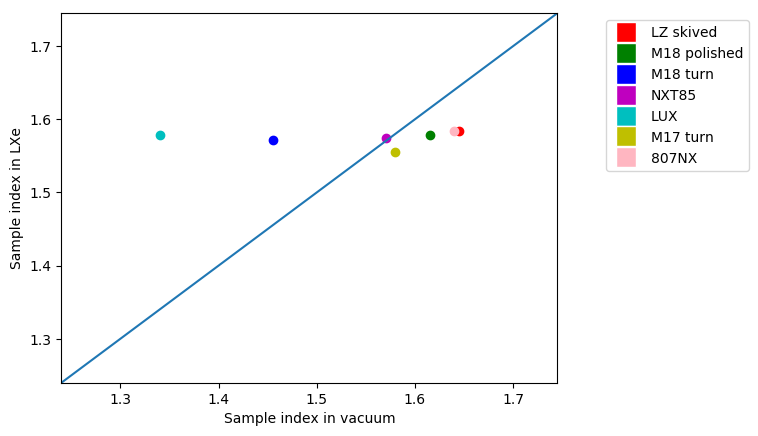

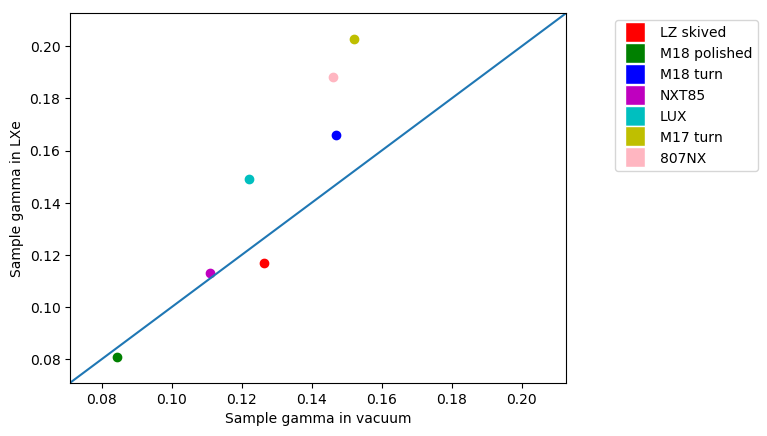

In [25]:
lxealbedomeans = np.zeros(len(sample_names))
vacalbedomeans = np.zeros(len(sample_names))
lxeindexmeans = np.zeros(len(sample_names))
vacindexmeans = np.zeros(len(sample_names))
lxegammameans = np.zeros(len(sample_names))
vacgammameans = np.zeros(len(sample_names))

legend_elements = [Line2D([0], [0], marker='s', color='w', label='LZ skived',markerfacecolor='r', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='M18 polished',markerfacecolor='g', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='M18 turn',markerfacecolor='b', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='NXT85',markerfacecolor='m', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='LUX',markerfacecolor='c', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='M17 turn',markerfacecolor='y', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='807NX',markerfacecolor='lightpink', markersize=15)]

for i in range(len(sample_names)):
    lxecount = 0
    vaccount = 0
    for entry in data:
        if entry[0] == sample_names[i] and entry[8] == 'lxe':
            lxecount += 1
            lxealbedomeans[i] += entry[1]
            lxeindexmeans[i] += entry[2]
            lxegammameans[i] += entry[3]
        if entry[0] == sample_names[i] and entry[8] == 'vac':
            vaccount += 1
            vacalbedomeans[i] += entry[1]
            vacindexmeans[i] += entry[2]
            vacgammameans[i] += entry[3]
    lxealbedomeans[i] = lxealbedomeans[i]/lxecount
    lxeindexmeans[i] = lxeindexmeans[i]/lxecount
    lxegammameans[i] = lxegammameans[i]/lxecount
    vacalbedomeans[i] = vacalbedomeans[i]/vaccount
    vacindexmeans[i] = vacindexmeans[i]/vaccount
    vacgammameans[i] = vacgammameans[i]/vaccount

for i in range(len(sample_names)):
    plt.plot(vacalbedomeans[i],lxealbedomeans[i],marker = 'o',color = colors(sample_names[i]))
x=plt.xlim([min([min(vacalbedomeans),min(lxealbedomeans)])-0.1,max([max(vacalbedomeans),max(lxealbedomeans)])+0.1])
y=plt.ylim([min([min(vacalbedomeans),min(lxealbedomeans)])-0.1,max([max(vacalbedomeans),max(lxealbedomeans)])+0.1])
plt.plot(x,y)
plt.legend(handles = legend_elements,bbox_to_anchor = [1.4,1])
plt.xlabel('Sample albedo in vacuum')
plt.ylabel('Sample albedo in LXe')
plt.figure()

for i in range(len(sample_names)):
    plt.plot(vacindexmeans[i],lxeindexmeans[i],marker = 'o',color = colors(sample_names[i]))
x=plt.xlim([min([min(vacindexmeans),min(lxeindexmeans)])-0.1,max([max(vacindexmeans),max(lxeindexmeans)])+0.1])
y=plt.ylim([min([min(vacindexmeans),min(lxeindexmeans)])-0.1,max([max(vacindexmeans),max(lxeindexmeans)])+0.1])
plt.plot(x,y)
plt.legend(handles = legend_elements,bbox_to_anchor = [1.4,1])
plt.xlabel('Sample index in vacuum')
plt.ylabel('Sample index in LXe')
plt.figure()

for i in range(len(sample_names)):
    plt.plot(vacgammameans[i],lxegammameans[i],marker = 'o',color = colors(sample_names[i]))
x=plt.xlim([min([min(vacgammameans),min(lxegammameans)])-0.01,max([max(vacgammameans),max(lxegammameans)])+0.01])
y=plt.ylim([min([min(vacgammameans),min(lxegammameans)])-0.01,max([max(vacgammameans),max(lxegammameans)])+0.01])
plt.plot(x,y)
plt.legend(handles = legend_elements,bbox_to_anchor = [1.4,1])
plt.xlabel('Sample gamma in vacuum')
plt.ylabel('Sample gamma in LXe')

The correlation between LXe and vacuum fit parameters is pretty unclear for both albedo and index, but strong for gamma. We see lower albedos (with the exception of M18 polished) and higher gammas (with the exceptions of M18 polished and LZ skived) in LXe compared to vacuum. In the case of gamma, this may be due to the wavelength being smaller in LXe.

### Same as above but using weighted average by chi^2

Text(0, 0.5, 'Sample gamma in LXe')

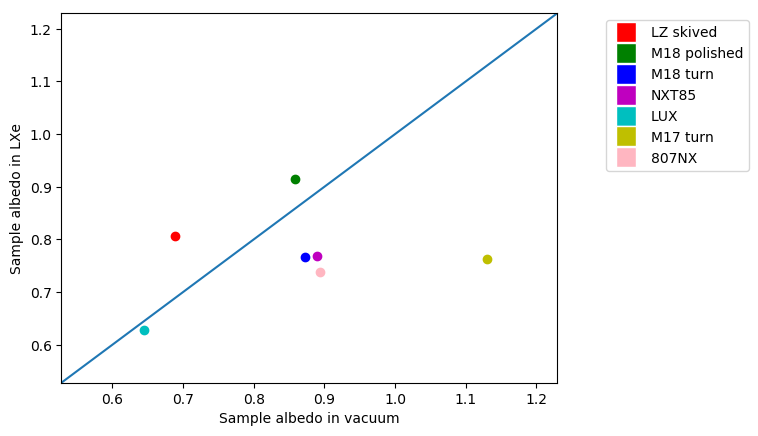

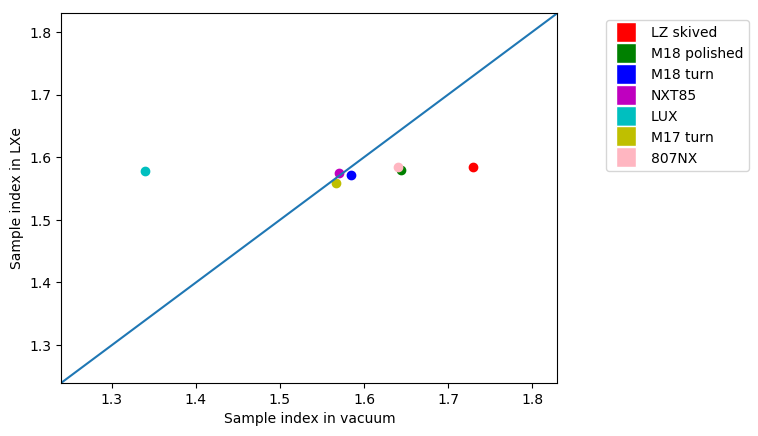

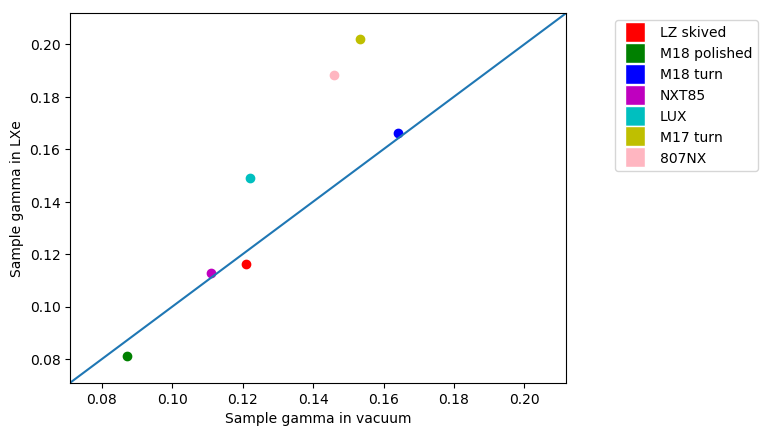

In [24]:
lxealbedomeans = np.zeros(len(sample_names))
vacalbedomeans = np.zeros(len(sample_names))
lxeindexmeans = np.zeros(len(sample_names))
vacindexmeans = np.zeros(len(sample_names))
lxegammameans = np.zeros(len(sample_names))
vacgammameans = np.zeros(len(sample_names))

legend_elements = [Line2D([0], [0], marker='s', color='w', label='LZ skived',markerfacecolor='r', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='M18 polished',markerfacecolor='g', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='M18 turn',markerfacecolor='b', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='NXT85',markerfacecolor='m', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='LUX',markerfacecolor='c', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='M17 turn',markerfacecolor='y', markersize=15),
                   Line2D([0], [0], marker='s', color='w', label='807NX',markerfacecolor='lightpink', markersize=15)]
for i in range(len(sample_names)):
    lxecount = 0
    vaccount = 0
    for entry in data:
        if entry[0] == sample_names[i] and entry[8] == 'lxe':
            lxecount += np.exp(-entry[5])
            lxealbedomeans[i] += entry[1]*np.exp(-entry[5])
            lxeindexmeans[i] += entry[2]*np.exp(-entry[5])
            lxegammameans[i] += entry[3]*np.exp(-entry[5])
        if entry[0] == sample_names[i] and entry[8] == 'vac':
            vaccount += np.exp(-entry[5])
            vacalbedomeans[i] += entry[1]*np.exp(-entry[5])
            vacindexmeans[i] += entry[2]*np.exp(-entry[5])
            vacgammameans[i] += entry[3]*np.exp(-entry[5])
    lxealbedomeans[i] = lxealbedomeans[i]/lxecount
    lxeindexmeans[i] = lxeindexmeans[i]/lxecount
    lxegammameans[i] = lxegammameans[i]/lxecount
    vacalbedomeans[i] = vacalbedomeans[i]/vaccount
    vacindexmeans[i] = vacindexmeans[i]/vaccount
    vacgammameans[i] = vacgammameans[i]/vaccount

for i in range(len(sample_names)):
    plt.plot(vacalbedomeans[i],lxealbedomeans[i],marker = 'o',color = colors(sample_names[i]))
x=plt.xlim([min([min(vacalbedomeans),min(lxealbedomeans)])-0.1,max([max(vacalbedomeans),max(lxealbedomeans)])+0.1])
y=plt.ylim([min([min(vacalbedomeans),min(lxealbedomeans)])-0.1,max([max(vacalbedomeans),max(lxealbedomeans)])+0.1])
plt.plot(x,y)
plt.legend(handles = legend_elements,bbox_to_anchor = [1.4,1])
plt.xlabel('Sample albedo in vacuum')
plt.ylabel('Sample albedo in LXe')
plt.figure()

for i in range(len(sample_names)):
    plt.plot(vacindexmeans[i],lxeindexmeans[i],marker = 'o',color = colors(sample_names[i]))
x=plt.xlim([min([min(vacindexmeans),min(lxeindexmeans)])-0.1,max([max(vacindexmeans),max(lxeindexmeans)])+0.1])
y=plt.ylim([min([min(vacindexmeans),min(lxeindexmeans)])-0.1,max([max(vacindexmeans),max(lxeindexmeans)])+0.1])
plt.plot(x,y)
plt.legend(handles = legend_elements,bbox_to_anchor = [1.4,1])
plt.xlabel('Sample index in vacuum')
plt.ylabel('Sample index in LXe')
plt.figure()

for i in range(len(sample_names)):
    plt.plot(vacgammameans[i],lxegammameans[i],marker = 'o',color = colors(sample_names[i]))
x=plt.xlim([min([min(vacgammameans),min(lxegammameans)])-0.01,max([max(vacgammameans),max(lxegammameans)])+0.01])
y=plt.ylim([min([min(vacgammameans),min(lxegammameans)])-0.01,max([max(vacgammameans),max(lxegammameans)])+0.01])
plt.plot(x,y)
plt.legend(handles = legend_elements,bbox_to_anchor = [1.4,1])
plt.xlabel('Sample gamma in vacuum')
plt.ylabel('Sample gamma in LXe')